<a href="https://colab.research.google.com/github/Makrufkasr/makrkm/blob/main/Cleaning_data_with_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd

In [46]:
#Import data from external
nyc = pd.read_csv('A_NYC_2019.csv')

In [47]:
#Show the data
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [48]:
# Understanding about data type
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [49]:
#Change data type last_review ('object') to ('Date')
nyc['last_review'] = pd.to_datetime(nyc['last_review'])
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [50]:
#Remove duplicates data
nyc.duplicated().sum()

0

In [51]:
# If Have you can try
nyc = nyc.drop_duplicates()

In [52]:
#Handling missing value
#First check msiing value
nyc.isna(). sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [53]:
#Because the missing values variable last_review and review_per_month not really significantly affect of overall data, we can ignore them,
#Next we will delete the missing value in the host_name  and name variable, then store it in the nyc variable
nyc[~nyc['name'].isna()].head()
nyc = nyc[~nyc['name'].isna()]
nyc[~nyc['host_name'].isna()].head()
nyc = nyc[~nyc['host_name'].isna()]
nyc.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

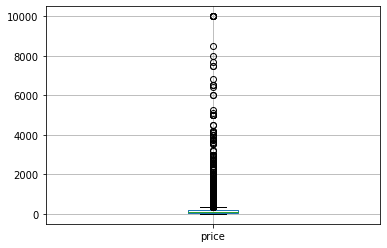

In [54]:
#Remove outliers
#Check outiers with boxplot
nyc.boxplot(column='price') 

In [55]:
#Check outliers with statistics descriptive
nyc['price'].describe()

count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [56]:
#Use statistics formula
q1= nyc['price'].quantile(0.25)
q3= nyc['price'].quantile(0.75)
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)

In [58]:
# Save the results
nyc = nyc[nyc['price'] > lower_limit]
nyc = nyc[nyc['price'] < upper_limit]
nyc['price'].describe()

count    45882.000000
mean       119.947583
std         68.112511
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        333.000000
Name: price, dtype: float64

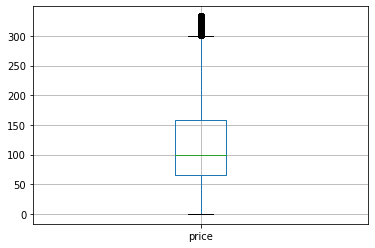

In [59]:
#After use statistics formula
nyc.boxplot(column='price')

In [60]:
#Result after cleaning proces
#structure data after cleaning proces
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45882 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              45882 non-null  int64         
 1   name                            45882 non-null  object        
 2   host_id                         45882 non-null  int64         
 3   host_name                       45882 non-null  object        
 4   neighbourhood_group             45882 non-null  object        
 5   neighbourhood                   45882 non-null  object        
 6   latitude                        45882 non-null  float64       
 7   longitude                       45882 non-null  float64       
 8   room_type                       45882 non-null  object        
 9   price                           45882 non-null  int64         
 10  minimum_nights                  45882 non-null  int64         
 11  nu

In [61]:
#Save and Download file as CSV
nyc.to_csv('NYC_cleaned1.csv')

from google.colab import files
files.download('NYC_cleaned1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>